# Project: Investigating No-Show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### About dataset
> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

### Questions To Be Explored
> <ol>
<li>What could be the relationship between age and no-show?</li>
<li>How does scholarship affects show-ups?</li>
<li>Which neighbourhoods have most number of show-ups?</li>
</ol>
#### <u>Dependent Variables</u>: Showing up / Not showing up for the appointment
#### <u>Independent Variables</u>: Age, Scholarship, SMS Notifications, Scheduling day


## Import statements

> I will use different cell for each import so that I can easily add new imports without re-importing everything

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling & Data Cleaning

> In this section I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis

### General Properties

In [4]:
path_dataset = 'noshowappointments-kagglev2-may-2016.csv'

### Loading dataset and displaying first 5 rows to understand the structure

In [5]:
dataset = pd.read_csv(path_dataset)
dataset.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


### Observations

> <ul>
<li> Scholarship, SMS and all problems are mentioned as integers. I would change that to True/False where 0 will be False and non-zeros will be True.</li>
<li> I would also change No-Show value to Did-Show as True/False where True means patient did show and false means no-show.</li>
<li> I will also like to correct the spelling mistakes in the header and will make everything lower case to avoid typo errors </li>
</ul>



#### Renaming headers

In [6]:
print('Before: ')
print (dataset.keys())

dataset.rename(columns = {'PatientId':'patient_id',
                          'AppointmentID':'appointment_id',
                          'Gender':'gender',
                          'ScheduledDay':'scheduled_day',
                          'AppointmentDay':'appointment_day',
                          'Age':'age',
                          'Neighbourhood':'neighbourhood',
                          'Scholarship':'has_scholarship',
                          'Hipertension':'is_hypertensive',
                          'Diabetes':'is_diabetic', 
                          'Alcoholism':'is_alcoholic',
                          'Handcap':'is_handicap',
                          'SMS_received':'got_sms',
                          'No-show':'did_show'
                         },
               inplace = True)

print('\nAfter: ')
print (dataset.keys())

Before: 
Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

After: 
Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'has_scholarship',
       'is_hypertensive', 'is_diabetic', 'is_alcoholic', 'is_handicap',
       'got_sms', 'did_show'],
      dtype='object')


#### Converting to boolean

In [7]:
dataset.has_scholarship = (dataset.has_scholarship != 0)
dataset.got_sms = (dataset.got_sms != 0)
dataset.is_hypertensive = (dataset.is_hypertensive != 0)
dataset.is_diabetic = (dataset.is_diabetic != 0)
dataset.is_alcoholic = (dataset.is_alcoholic != 0)
dataset.is_handicap = (dataset.is_handicap != 0)
dataset.did_show = (dataset.did_show == 'No')

#### Converting to yes/no

In [8]:
def bool2yesno(val):
    if(val):
        return 'Yes'
    return 'No'

In [9]:
dataset.has_scholarship = dataset.has_scholarship.apply(bool2yesno)

In [10]:
dataset.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,has_scholarship,is_hypertensive,is_diabetic,is_alcoholic,is_handicap,got_sms,did_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,True,False,False,False,False,True


#### Separating date and time
scheduled_day --> scheduled_date, scheduled_time

appointment_day --> appointment_date, appointment_time

In [11]:
dataset['scheduled_date'], dataset['scheduled_time'] = dataset['scheduled_day'].str.split('T', 1).str
dataset['appointment_date'], dataset['appointment_time'] = dataset['appointment_day'].str.split('T', 1).str

#Removing old columns
del dataset['scheduled_day']
del dataset['appointment_day']

In [12]:
dataset.head(1)

,patient_id,appointment_id,gender,age,neighbourhood,has_scholarship,is_hypertensive,is_diabetic,is_alcoholic,is_handicap,got_sms,did_show,scheduled_date,scheduled_time,appointment_date,appointment_time
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,No,True,False,False,False,False,True,2016-04-29,18:38:08Z,2016-04-29,00:00:00Z


### Checking anamolies

In [13]:
print('Gender:',dataset.gender.unique())
print('Age:',sorted(dataset.age.unique()))
print('Neighbourhood:',dataset.neighbourhood.unique())
print('HasScholarship:',dataset.has_scholarship.unique())
print('IsHypertensive:',dataset.is_hypertensive.unique())
print('IsDiabetic:',dataset.is_diabetic.unique())
print('IsAlchoholic:',dataset.is_alcoholic.unique())
print('IsHandicap:',dataset.is_handicap.unique())
print('GotSMS:',dataset.got_sms.unique())
print('DidShow:',dataset.did_show.unique())
print('ScheduledDate:',dataset.scheduled_date.unique())
print('ScheduledTime:',dataset.scheduled_time.unique())
print('AppointmentDate:',dataset.appointment_date.unique())
print('AppointmentTime:',dataset.appointment_time.unique())

Gender: ['F' 'M']
Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'S

#### I see following problems:
<ul>
<li><u>age</u>: some age are negative, I will remove them. Also since age grater than 100 is not very common I will remove that too.</li>
<li><u>scheduled_date/appointment_date</u>: Will convert to date</li>
<li><u>appointment_time</u>: All the values are 0. Will remove this</li>
<li><u>scheduled_time</u>: Ends with Z (But I do not need this column, so will remove it later)</li>
</ul>

In [14]:
dataset = dataset[(dataset.age >= 0) & (dataset.age < 100)]

In [15]:
dataset['scheduled_date'] = dataset.scheduled_date.apply(np.datetime64)
dataset['appointment_date'] = dataset.appointment_date.apply(np.datetime64)

#### Removing columns that are not required

In [16]:
dataset.keys()

Index(['patient_id', 'appointment_id', 'gender', 'age', 'neighbourhood',
       'has_scholarship', 'is_hypertensive', 'is_diabetic', 'is_alcoholic',
       'is_handicap', 'got_sms', 'did_show', 'scheduled_date',
       'scheduled_time', 'appointment_date', 'appointment_time'],
      dtype='object')

In [17]:
del dataset['scheduled_time']
del dataset['appointment_time']
dataset.keys()

Index(['patient_id', 'appointment_id', 'gender', 'age', 'neighbourhood',
       'has_scholarship', 'is_hypertensive', 'is_diabetic', 'is_alcoholic',
       'is_handicap', 'got_sms', 'did_show', 'scheduled_date',
       'appointment_date'],
      dtype='object')

#### Cross checking that appointment_date is never before the scheduling_date

In [18]:
dataset = dataset[dataset.scheduled_date <= dataset.appointment_date]

### I will also add a column indication the days between scheduling and appointment. I will call it 'wait'

In [19]:
dataset['wait'] = dataset['appointment_date'] - dataset['scheduled_date']

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

In [20]:
def get_groupby_unique(dataset, group_by):
    """
    Method to return only unique elements after grouping based on groupby
    """
    return dataset[group_by].unique()

In [21]:
def get_groupby_mean(df, group_by, correlation_with):
    """
    Method to get the mean of 'correlation_with' columns when grouped by 'group_by' column
    """
    return df.groupby(group_by)[correlation_with].mean()

### Single Variable Exploration (On 'age')

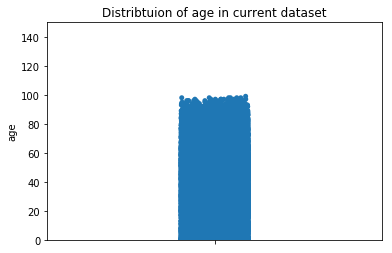

In [22]:
sns.stripplot(data = dataset, y = 'age', jitter = True)
plt.ylim(0, 150)
plt.title('Distribtuion of age in current dataset')
plt.show()

It looks like a good distribution, as we have removed the age less than 0 and grater than 100. 

### Research Question 1 (Relationship between a person showing up and his/her age!)

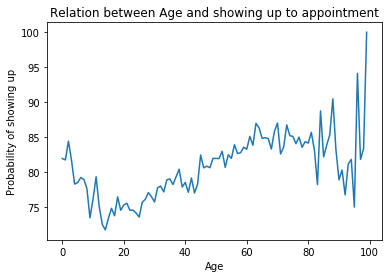

In [23]:
group_by = 'age'
correlation_with = 'did_show'

age_wise_data = get_groupby_unique(dataset, group_by)
did_show_prob = get_groupby_mean(dataset, group_by, correlation_with)*100

plt.title('Relation between Age and showing up to appointment')
plt.xlabel('Age')
plt.ylabel('Probability of showing up')
plt.plot(did_show_prob)
plt.show()

We see an upward inclined towards showing to the appointment, especially in the age group 20-80. It <b>seems</b> age is correlated with showing up on the appointment.

### Research Question 2  (Relationship between showing for appointment and neighbourhood)

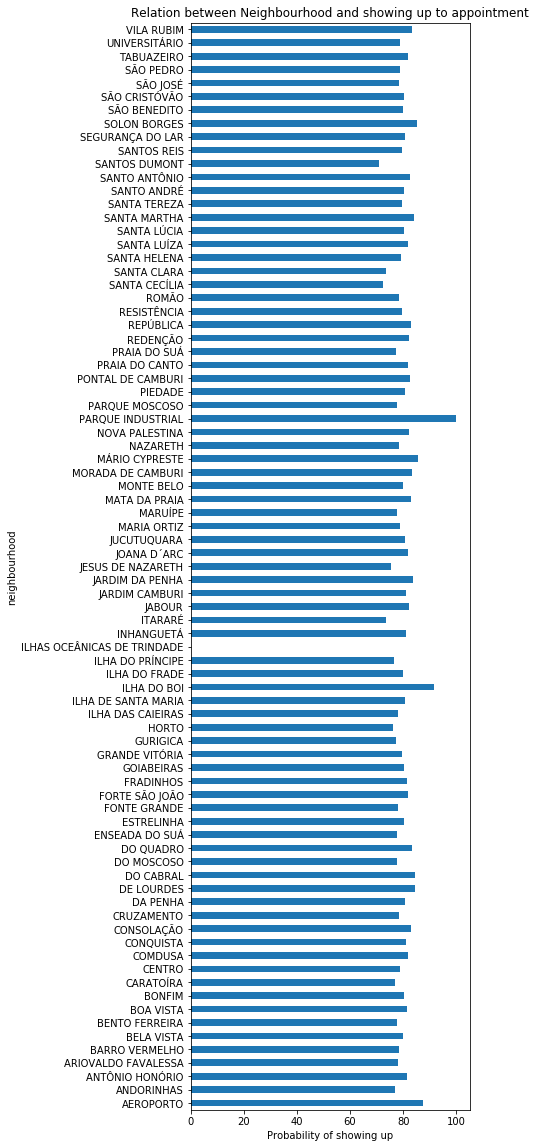

In [24]:
group_by = 'neighbourhood'
correlation_with = 'did_show'

neighbourhood_wise_data = get_groupby_mean(dataset, group_by, correlation_with)*100
neighbourhood_wise_data.plot.barh(figsize=(5,20), title='Relation between Neighbourhood and showing up to appointment')
plt.xlabel('Probability of showing up')
plt.show()

Let's shortlist the ones with grater than 90% accuracy on attending the appointments.

In [25]:
neighbourhood_wise_data[neighbourhood_wise_data > 90]

neighbourhood
ILHA DO BOI           91.428571
PARQUE INDUSTRIAL    100.000000
Name: did_show, dtype: float64

Hence, 2 neighbourhoods, 'ILHA DO BOI' and 'PARQUE INDUSTRIAL' show the highest show_ups with latter showing 100% accuracy.

### Research Question 3  (Relationship b/w scholarship and going to appointment)

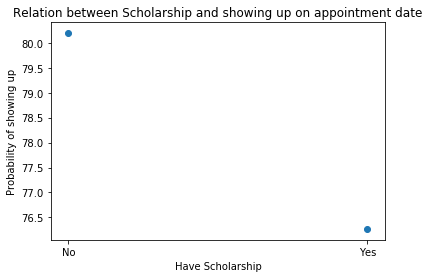

In [29]:
group_by = 'has_scholarship'
correlation_with = 'did_show'

scholarship_wise_data = get_groupby_unique(dataset, group_by)
did_show_prob = get_groupby_mean(dataset, group_by, correlation_with)*100

plt.title('Relation between Scholarship and showing up on appointment date')
plt.xlabel('Have Scholarship')
plt.ylabel('Probability of showing up')
plt.scatter(x=scholarship_wise_data, y=did_show_prob)
plt.show()

It looks like the people without the scholarship have better chances of going to appointments than the one which have been given the scholarship.

<a id='conclusions'></a>
## Conclusions

We analysed the 'No-show Appointments' dataset on Age, Neighbourhood and Scholarship.

><ul>
<li>We found some correlation b/w the age and showing up to the appointment. (Though we have not performed any statistical tests and hence cannot confirm this result)</li>
<li>We saw that in the given dataset, people from 'ILHA DO BOI' and 'PARQUE INDUSTRIAL' have the highest average probability of showing up on the 
appointment date.</li>
<li>We also found that for the given dataset, people without scholarship have around 4% more probablity of showing up than those with scholarship</li>
</ul>


PS: All the results above are tentative as we have not performed any statistical tests.

#### Future Work
<ul>
<li>We may run statistical search over this data to confirm the correlation</li>
<li>We may try to find other factors which may affect the show/no-show status like Gender, SMS notifications, Day/Month of scheduling/appointment</li>
<li>We may also look towards patients with what problems are more to schedule an appointment but then later do not show up</li>
</ul

#### Limitations
It would have been better if there had been more relevant features in the datasets like below:
<ul>
<li>Distance of neighbourhoods from the clinic</li>
<li>Have these appointments being scheduled by the patient or by someone else on the behalf of patients</li>
<li>What is the overall review (rating) for the clinics. It is possible that patients would not come for appointment only in some particular clinics.</li>
</ul>

There are some other factors that we are not sure of, and which may affect the accuracy of our prediction:
<ul>
<li>We do not know about how easy it is to find the location of treatment. Maybe some people come for treatment but they were not able to find the location</li>
<li>We are also not sure if no-show covers the case when a patient may have arrived later than his original appointment time</li>
<li>What happens if a patient re-schedule his appointment. Was this data updated?</li>
</ul>



##### Hence we may not have a concrete solution since there could be many uncontrolled variables that could have resulted in the no-show scenario.
